In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv("karuna1.CSV")
df.head(5)


,TARGET,ID,DATE,FLAG,USER,TEXT
0,neutral,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"I`d have responded, if I were going"
1,negative,1.467810e+09,Mon Apr 06 22:19:45 PDT 2010,NO_QUERY,scotthamilton,Sooo SAD I will miss you here in San Diego!!!
2,negative,1.467810e+09,Mon Apr 06 22:19:45 PDT 2011,NO_QUERY,mattycus,my boss is bullying me...
3,negative,1.467810e+09,Mon Apr 06 22:19:45 PDT 2012,NO_QUERY,ElleCTF,what interview! leave me alone
4,negative,1.467810e+09,Mon Apr 06 22:19:45 PDT 2013,NO_QUERY,Karoli,"Sons of ****, why couldn`t they put them on t..."


In [3]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-6ruyzrda
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-6ruyzrda
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7623 sha256=6be4671b87f96427660ea426d0e3cb3404395661ab6428c94be27e5e7c53dda5
  Stored in directory: /tmp/pip-ephem-wheel-cache-m5ze2m90/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [4]:
import preprocess_kgptalkie as ps
import re

In [6]:
!pip install mlxtend
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:

df['word_counts'] = df['TEXT'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['TEXT'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['TEXT'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['TEXT'].apply(lambda x: ps.get_stopwords_counts(x))

df['TEXT'] = df['TEXT'].apply(lambda x: ps.remove_html_tags(x))
df['TEXT'] = df['TEXT'].str.lower()

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [11]:
df['review_without_stopwords'] = df['TEXT'].apply(lambda x: ps.remove_stopwords(x))

In [13]:
df.head(1)

,TARGET,ID,DATE,FLAG,USER,TEXT,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,neutral,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"i`d have responded, if i were going",7,29,4.142857,3,"i`d responded, going"


In [14]:
df.columns

Index(['TARGET', 'ID', 'DATE', 'FLAG', 'USER', 'TEXT', 'word_counts',
       'char_counts', 'avg_wordlength', 'stopwords_counts',
       'review_without_stopwords'],
      dtype='object')

In [15]:
import seaborn as sns

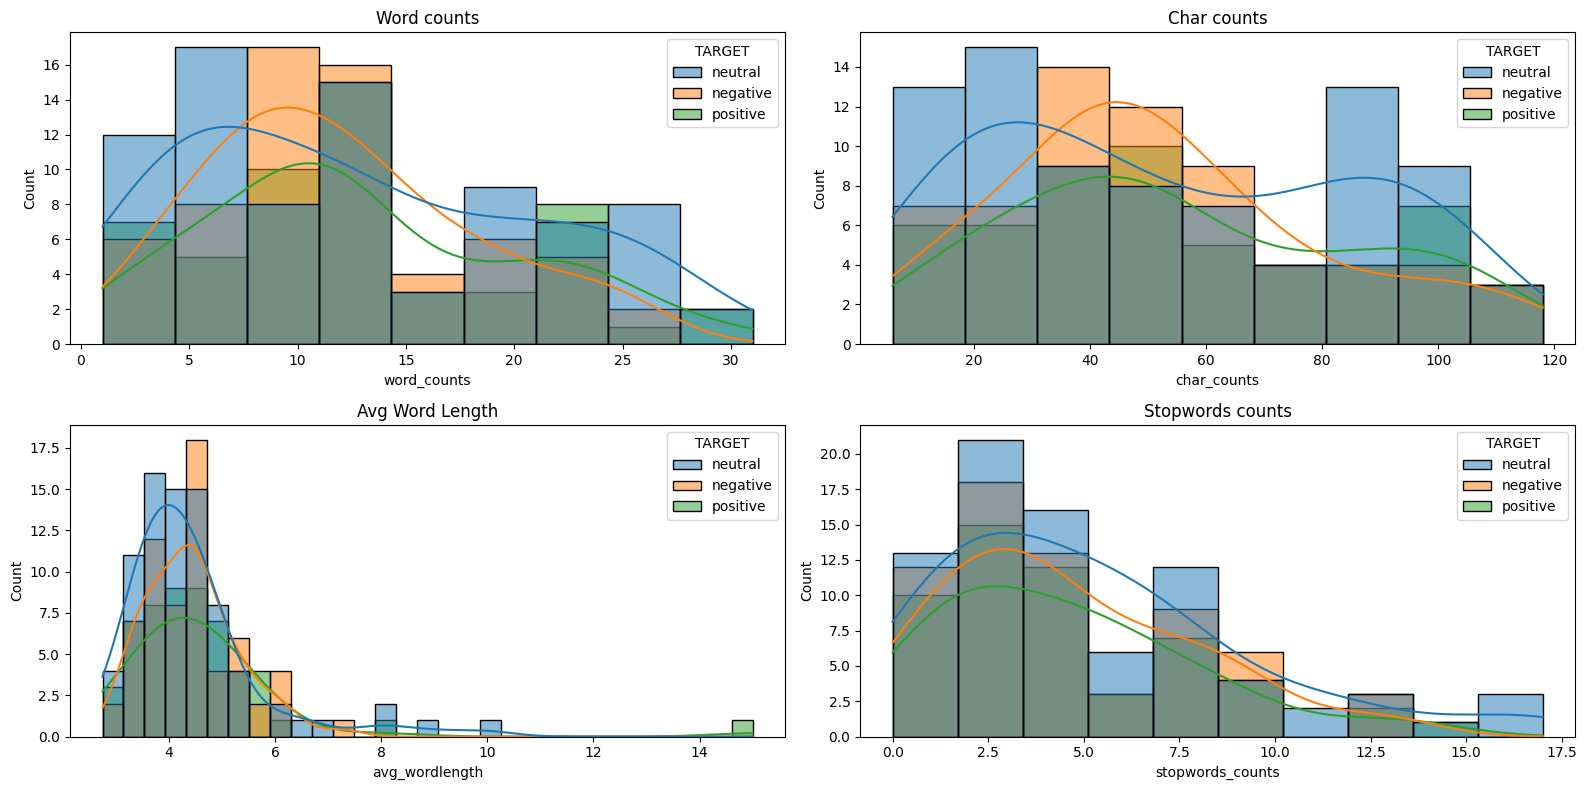

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='TARGET', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='TARGET', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='TARGET', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='TARGET', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['TEXT'],
                                                    df['TARGET'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['TARGET']
                                                   )

In [20]:
X_train.shape, X_test.shape

((159,), (40,))

In [21]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [22]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.50      0.38      0.43        13
     neutral       0.59      0.81      0.68        16
    positive       0.62      0.45      0.53        11

    accuracy                           0.57        40
   macro avg       0.57      0.55      0.55        40
weighted avg       0.57      0.57      0.56        40



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

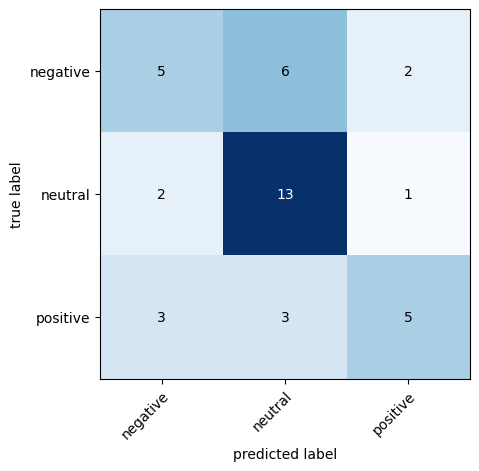

In [25]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [26]:
clf.predict(['what interview leave me alone'])

array(['negative'], dtype=object)

In [27]:
clf.predict(['i want to talk with you'])

array(['neutral'], dtype=object)

In [29]:
import pickle

pickle.dump(clf, open('bishal.pkl', 'wb'))